<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <a href="http://bokeh.pydata.org/">     
           <img 
               src="assets/bokeh-transparent.png" 
               style="width:50px"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>07. Exporting and Embedding</h2></div>

# Some Setup

In [1]:
import pandas as pd

from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL

df = pd.DataFrame(AAPL)
df['date'] = pd.to_datetime(df['date'])

# Displaying in the Notebook

In [2]:
from bokeh.io import output_notebook, show
from bokeh.resources import INLINE
output_notebook(INLINE)

Loading BokehJS ...

In [3]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)

show(p)

# Saving to an HTML File

In [4]:
from bokeh.io import output_file, show

In [5]:
output_file("plot.html")

In [6]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)

show(p)   # save(p) will save without opening a new browser tab

In [7]:
from bokeh.io import reset_output
reset_output()

# Templating in HTML Documents

In [8]:
import jinja2
from bokeh.embed import components

In [9]:
# IMPORTANT NOTE!! The version of BokehJS loaded in the template should match 
# the version of Bokeh installed locally.

template = jinja2.Template("""
<!DOCTYPE html>
<html lang="en-US">

<link
    href="http://cdn.pydata.org/bokeh/dev/bokeh-0.12.7rc3.min.css"
    rel="stylesheet" type="text/css"
>
<script 
    src="http://cdn.pydata.org/bokeh/dev/bokeh-0.12.7rc3.min.js"
></script>

<body>

    <h1>Hello Bokeh!</h1>
    
    <p> Below is a simple plot of stock closing prices </p>
    
    {{ script }}
    
    {{ div }}

</body>

</html>
""")

In [10]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)

script, div = components(p)

In [11]:
from IPython.display import HTML
HTML(template.render(script=script, div=div))

In [12]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_bokeh():
   return template.render(script=script, div=div)

In [13]:
# Uncomment to run the Flask Server. Use Kernel -> Interrupt from Notebook menubar to stop 
#app.run(port=5050)

In [14]:
# EXERCISE: Create your own template (or modify the one above) 


In [14]:
from bokeh.io import export_png

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)

export_png(p, filename="plot.png")

ImportError: cannot import name exportpng

In [15]:
from IPython.display import Image
Image('plot.png')

In [17]:
# EXERCISE: Save a layout of plots (e.g. row or column) as SVG and see what happens 


In [16]:
from bokeh.io import export_svgs

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime", output_backend='svg')
p.line(df['date'], df['close'], color='navy', alpha=0.5)

export_svgs(p, filename="plot.svg")

ImportError: cannot import name export_svgs

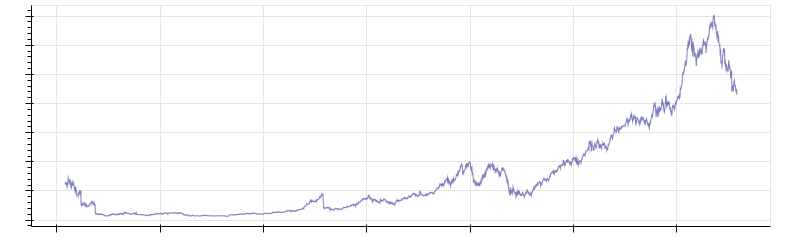

In [19]:
from IPython.display import SVG
SVG('plot.svg')

In [20]:
# EXERCISE: Save a layout of plots (e.g. row or column) as SVG and see what happens 
